In [1]:
#K-Vecinos mas cercanos

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Instructor\AppData\Local\Temp\ipykernel_4724\2941396078.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
pwd

'e:\\SENATI\\PlanSesion20204-1\\ING-SOFT-SEMESTRE-IV\\1-ALGORITMOS-IA\\AlgoritmosIA'

In [3]:
ls

 El volumen de la unidad E es BlueDisk
 El n�mero de serie del volumen es: B4B5-099C

 Directorio de e:\SENATI\PlanSesion20204-1\ING-SOFT-SEMESTRE-IV\1-ALGORITMOS-IA\AlgoritmosIA

29/02/2024  08:23    <DIR>          .
29/02/2024  08:23    <DIR>          ..
22/02/2024  21:36             9,128 DataSetDiabetes.zip
22/02/2024  21:40            23,876 diabetes.csv
23/02/2024  13:14           251,730 diabetes.ipynb
16/02/2024  11:52                60 Ejemplo_excel.csv
16/02/2024  11:04             5,508 Ejemplo_excel.xlsx
29/02/2024  08:11                 0 knn.ipynb
22/02/2024  10:28           268,626 matplotlib.ipynb
16/02/2024  10:55                19 Modelo1.py
16/02/2024  10:55            22,530 numpy.ipynb
16/02/2024  13:41           794,894 pandas.ipynb
22/02/2024  23:03           251,588 Predicciondiabetes.ipynb
16/02/2024  10:55           114,171 PrimerModelo.ipynb
23/02/2024  13:14           301,156 regresionLogistica.ipynb
16/02/2024  12:13             5,087 salida_excel_py.xlsx
2

In [4]:
dataframe = pd.read_csv("vehiculos.csv")

In [6]:
dataframe.head()

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance_major_axis,scaled_variance_minor_axis,scaled_radius_gyration,skewness_major_axis,skewness_minor_axis,kurtosis_minor_axis,kurtosis_major_axis,hollows_ratio,vehicle_class
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0,van
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0,van
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0,saab
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0,van
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0,bus


In [7]:
dataframe["vehicle_class"].unique()

array(['van', 'saab', 'bus', 'opel'], dtype=object)

In [8]:
y=dataframe["vehicle_class"]
X=dataframe.drop("vehicle_class",axis=1)

In [10]:
X

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance_major_axis,scaled_variance_minor_axis,scaled_radius_gyration,skewness_major_axis,skewness_minor_axis,kurtosis_minor_axis,kurtosis_major_axis,hollows_ratio
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93.0,39.0,87.0,183.0,64.0,8.0,169.0,40.0,20.0,134.0,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195.0
842,89.0,46.0,84.0,163.0,66.0,11.0,159.0,43.0,20.0,159.0,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197.0
843,106.0,54.0,101.0,222.0,67.0,12.0,222.0,30.0,25.0,173.0,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201.0
844,86.0,36.0,78.0,146.0,58.0,7.0,135.0,50.0,18.0,124.0,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195.0


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=45)

In [13]:
X_train

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance_major_axis,scaled_variance_minor_axis,scaled_radius_gyration,skewness_major_axis,skewness_minor_axis,kurtosis_minor_axis,kurtosis_major_axis,hollows_ratio
810,97.0,55.0,103.0,197.0,63.0,11.0,215.0,31.0,24.0,172.0,219.0,677.0,219.0,75.0,5.0,24.0,185.0,194.0
675,100.0,58.0,109.0,230.0,70.0,11.0,226.0,30.0,25.0,182.0,234.0,752.0,207.0,72.0,0.0,13.0,187.0,198.0
828,89.0,42.0,66.0,125.0,53.0,7.0,131.0,51.0,18.0,144.0,162.0,254.0,162.0,73.0,10.0,17.0,188.0,191.0
429,84.0,37.0,70.0,145.0,62.0,9.0,136.0,48.0,18.0,134.0,159.0,280.0,140.0,68.0,11.0,9.0,194.0,202.0
227,94.0,35.0,66.0,147.0,62.0,9.0,131.0,50.0,18.0,127.0,159.0,258.0,115.0,66.0,8.0,7.0,196.0,201.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,91.0,37.0,76.0,138.0,55.0,8.0,132.0,51.0,18.0,135.0,157.0,256.0,124.0,69.0,0.0,12.0,191.0,192.0
607,86.0,39.0,62.0,129.0,59.0,6.0,116.0,57.0,17.0,135.0,137.0,203.0,145.0,64.0,7.0,9.0,199.0,204.0
544,88.0,43.0,70.0,177.0,74.0,19.0,152.0,44.0,19.0,143.0,180.0,342.0,168.0,76.0,1.0,9.0,186.0,189.0
643,95.0,43.0,83.0,198.0,69.0,6.0,177.0,36.0,21.0,139.0,189.0,484.0,163.0,68.0,6.0,4.0,196.0,198.0


In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [15]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [16]:
prediccion = knn.predict(X_test)

In [17]:
prediccion

array(['saab', 'opel', 'saab', 'opel', 'saab', 'van', 'saab', 'opel',
       'saab', 'van', 'opel', 'bus', 'van', 'opel', 'opel', 'van', 'opel',
       'saab', 'bus', 'saab', 'bus', 'saab', 'bus', 'bus', 'bus', 'bus',
       'opel', 'saab', 'van', 'bus', 'opel', 'opel', 'bus', 'bus', 'opel',
       'bus', 'van', 'bus', 'bus', 'van', 'van', 'opel', 'opel', 'bus',
       'saab', 'van', 'bus', 'bus', 'opel', 'bus', 'bus', 'saab', 'opel',
       'van', 'bus', 'saab', 'saab', 'bus', 'saab', 'opel', 'van', 'van',
       'bus', 'bus', 'saab', 'van', 'bus', 'bus', 'van', 'saab', 'van',
       'bus', 'opel', 'van', 'opel', 'van', 'saab', 'saab', 'bus', 'bus',
       'van', 'saab', 'saab', 'van', 'bus', 'bus', 'saab', 'saab', 'opel',
       'van', 'van', 'van', 'van', 'saab', 'saab', 'saab', 'saab', 'opel',
       'opel', 'saab', 'bus', 'bus', 'bus', 'saab', 'van', 'bus', 'saab',
       'saab', 'saab', 'bus', 'van', 'bus', 'opel', 'bus', 'saab', 'saab',
       'opel', 'van', 'opel', 'saab', 'ope

In [18]:
from sklearn.metrics 
import classification_report, confusion_matrix
print (confusion_matrix(y_test,prediccion))

[[36  0  7  3]
 [ 5 15 21  5]
 [ 5 20 16  3]
 [ 2  0  2 30]]


In [19]:
print(classification_report(y_test,prediccion))

              precision    recall  f1-score   support

         bus       0.75      0.78      0.77        46
        opel       0.43      0.33      0.37        46
        saab       0.35      0.36      0.36        44
         van       0.73      0.88      0.80        34

    accuracy                           0.57       170
   macro avg       0.56      0.59      0.57       170
weighted avg       0.56      0.57      0.56       170



In [20]:
tasa_error = []
for i in range (1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    prediccion_i=knn.predict(X_test)
    tasa_error.append(np.mean(prediccion_i != y_test))

In [21]:
tasa_error

[0.4294117647058823,
 0.4,
 0.34705882352941175,
 0.32941176470588235,
 0.35294117647058826,
 0.38823529411764707,
 0.3411764705882353,
 0.38823529411764707,
 0.4,
 0.3941176470588235,
 0.3941176470588235,
 0.3941176470588235,
 0.40588235294117647,
 0.4,
 0.38235294117647056,
 0.3764705882352941,
 0.3764705882352941,
 0.4,
 0.37058823529411766,
 0.37058823529411766,
 0.38823529411764707,
 0.38823529411764707,
 0.38823529411764707,
 0.4117647058823529,
 0.40588235294117647,
 0.4235294117647059,
 0.4117647058823529,
 0.4176470588235294,
 0.4235294117647059]

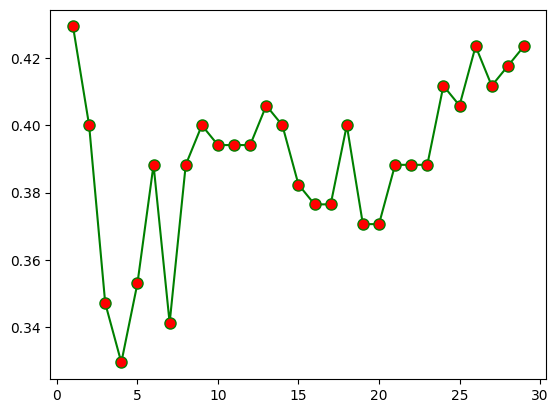

In [22]:
valores = range(1,30)
plt.plot(valores, tasa_error, 
         color="green", 
         marker="o", 
         markerfacecolor="red",
         markersize=8)

In [24]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
prediccion=knn.predict(X_test)
print(classification_report(y_test,prediccion))

              precision    recall  f1-score   support

         bus       0.81      0.91      0.86        46
        opel       0.57      0.52      0.55        46
        saab       0.50      0.39      0.44        44
         van       0.74      0.91      0.82        34

    accuracy                           0.67       170
   macro avg       0.65      0.68      0.66       170
weighted avg       0.65      0.67      0.66       170

